In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 行内显示图片
def cv2_imshow(image):
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

def plt_format(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 弹出窗口展示图片
def window_show(image):
    cv2.imshow('image',image)
    cv2.waitKey(10000)
    cv2.destroyAllWindows()

In [2]:
gray0 = cv2.imread('lay/09.png',0)

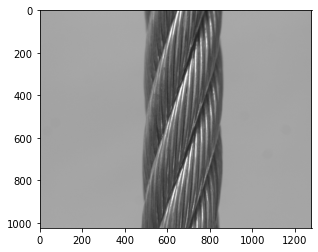

In [74]:
cv2_imshow(gray0)

In [3]:
lsd = cv2.createLineSegmentDetector(cv2.LSD_REFINE_NONE, 0.7)  # 检测直线

In [4]:
lines,_,_,_ = lsd.detect(gray0)
with_line_img1 = lsd.drawSegments(gray0, lines)

In [20]:
window_show(with_line_img1)

In [5]:

print(lines[0].shape)

(1, 4)


In [6]:
line2 = []
angle_list = []
if lines[0] is not None:
    # 遍历每条检测出的线
    for line in lines:
        # 获取合适长度的线(line1-line3绝对值 > 指定宽度)
        if np.abs(line[0][0] - line[0][2]) > 80:
            print('线宽:',np.abs(line[0][0] - line[0][2]))
            # if int((line[0][2] - line[0][1]))>200:
            # line2.append(line)
            # print(line2)
            # 判断获取到的线是否准确
            # if line2[0][3] != line2[0][1] and line2[0][2] != line2[0][0]:
                # break
            # 计算角度  对边/临边算出后乘180/pi
            angle = np.arctan(float(line[0][3] - line[0][1])/float(line[0][2] - line[0][0])) * -180 / np.pi
            
            if 80>angle>50:
                print('角度:',angle)
                line2.append(line)
                angle_list.append(angle)

线宽: 146.93921
角度: 72.4286804883831
线宽: 102.83893
角度: 70.80225397368032
线宽: 151.98672
角度: 72.38421418731463
线宽: 189.87653
角度: 70.95187133253815
线宽: 88.05444
角度: 73.68951453106911
线宽: 80.11389
角度: 73.25353491503586


In [ ]:
line2

In [7]:
line3 = np.array(line2)
with_line_img = lsd.drawSegments(gray0, line3)
window_show(with_line_img)

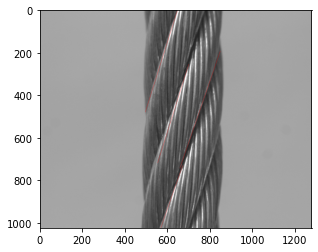

In [65]:
cv2_imshow(with_line_img)

In [8]:
angle_list

[72.4286804883831,
 70.80225397368032,
 72.38421418731463,
 70.95187133253815,
 73.68951453106911,
 73.25353491503586]

In [9]:
# data_list = [1,2,3,4,5,5,4,3,2,1,1,2,3,4,5,5,4,3,2,1,10000,-10000]
data_array = np.asarray(angle_list)

mean = np.mean(data_array , axis=0)
std = np.std(data_array , axis=0)
print('均值与标准差',mean,std)

# 剔除一个标准差外的数据
preprocessed_data_array = [x for x in data_array if (x > mean - std)]
preprocessed_data_array = [x for x in preprocessed_data_array if (x < mean + std)]
ang = np.mean(preprocessed_data_array)

均值与标准差 72.25167823800352 1.0731817391115084


In [85]:
print(ang)

72.68880986357786


In [11]:
D = 95-30

In [13]:
f"捻距为{D*np.pi/np.tan(ang)}mm"

'捻距为442.7073201057281mm'

In [3]:
blur = cv2.bilateralFilter(gray0,9,75,75)

In [16]:
kernel = np.ones((35,35),np.uint8)
erosion = cv2.erode(gray0,kernel,iterations = 1)
opening = cv2.morphologyEx(gray0, cv2.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

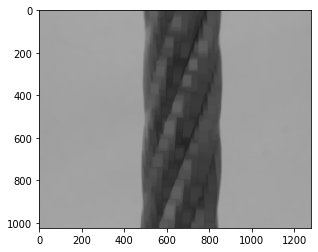

In [17]:
cv2_imshow(opening)